In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg
import matplotlib as mpl
import itertools
import matplotlib.patches as mpatches
from matplotlib import cm

In [2]:
colors = [
    "#ffdc00","#2ecc40", "#85144b", "#3d9970", "#0074d9", "#ff851b", "#0ff000"
]

In [3]:

def load_data(file_name=None):
    embeddings = []
    if file_name is None:
        file_name = "../data/Technology_sample7000_vectors_TSNEed.txt"
    with open(file_name, 'r') as rfile:
        for line in rfile:
            split = line.split(',')
            embeddings.append(split[1:])
    return embeddings

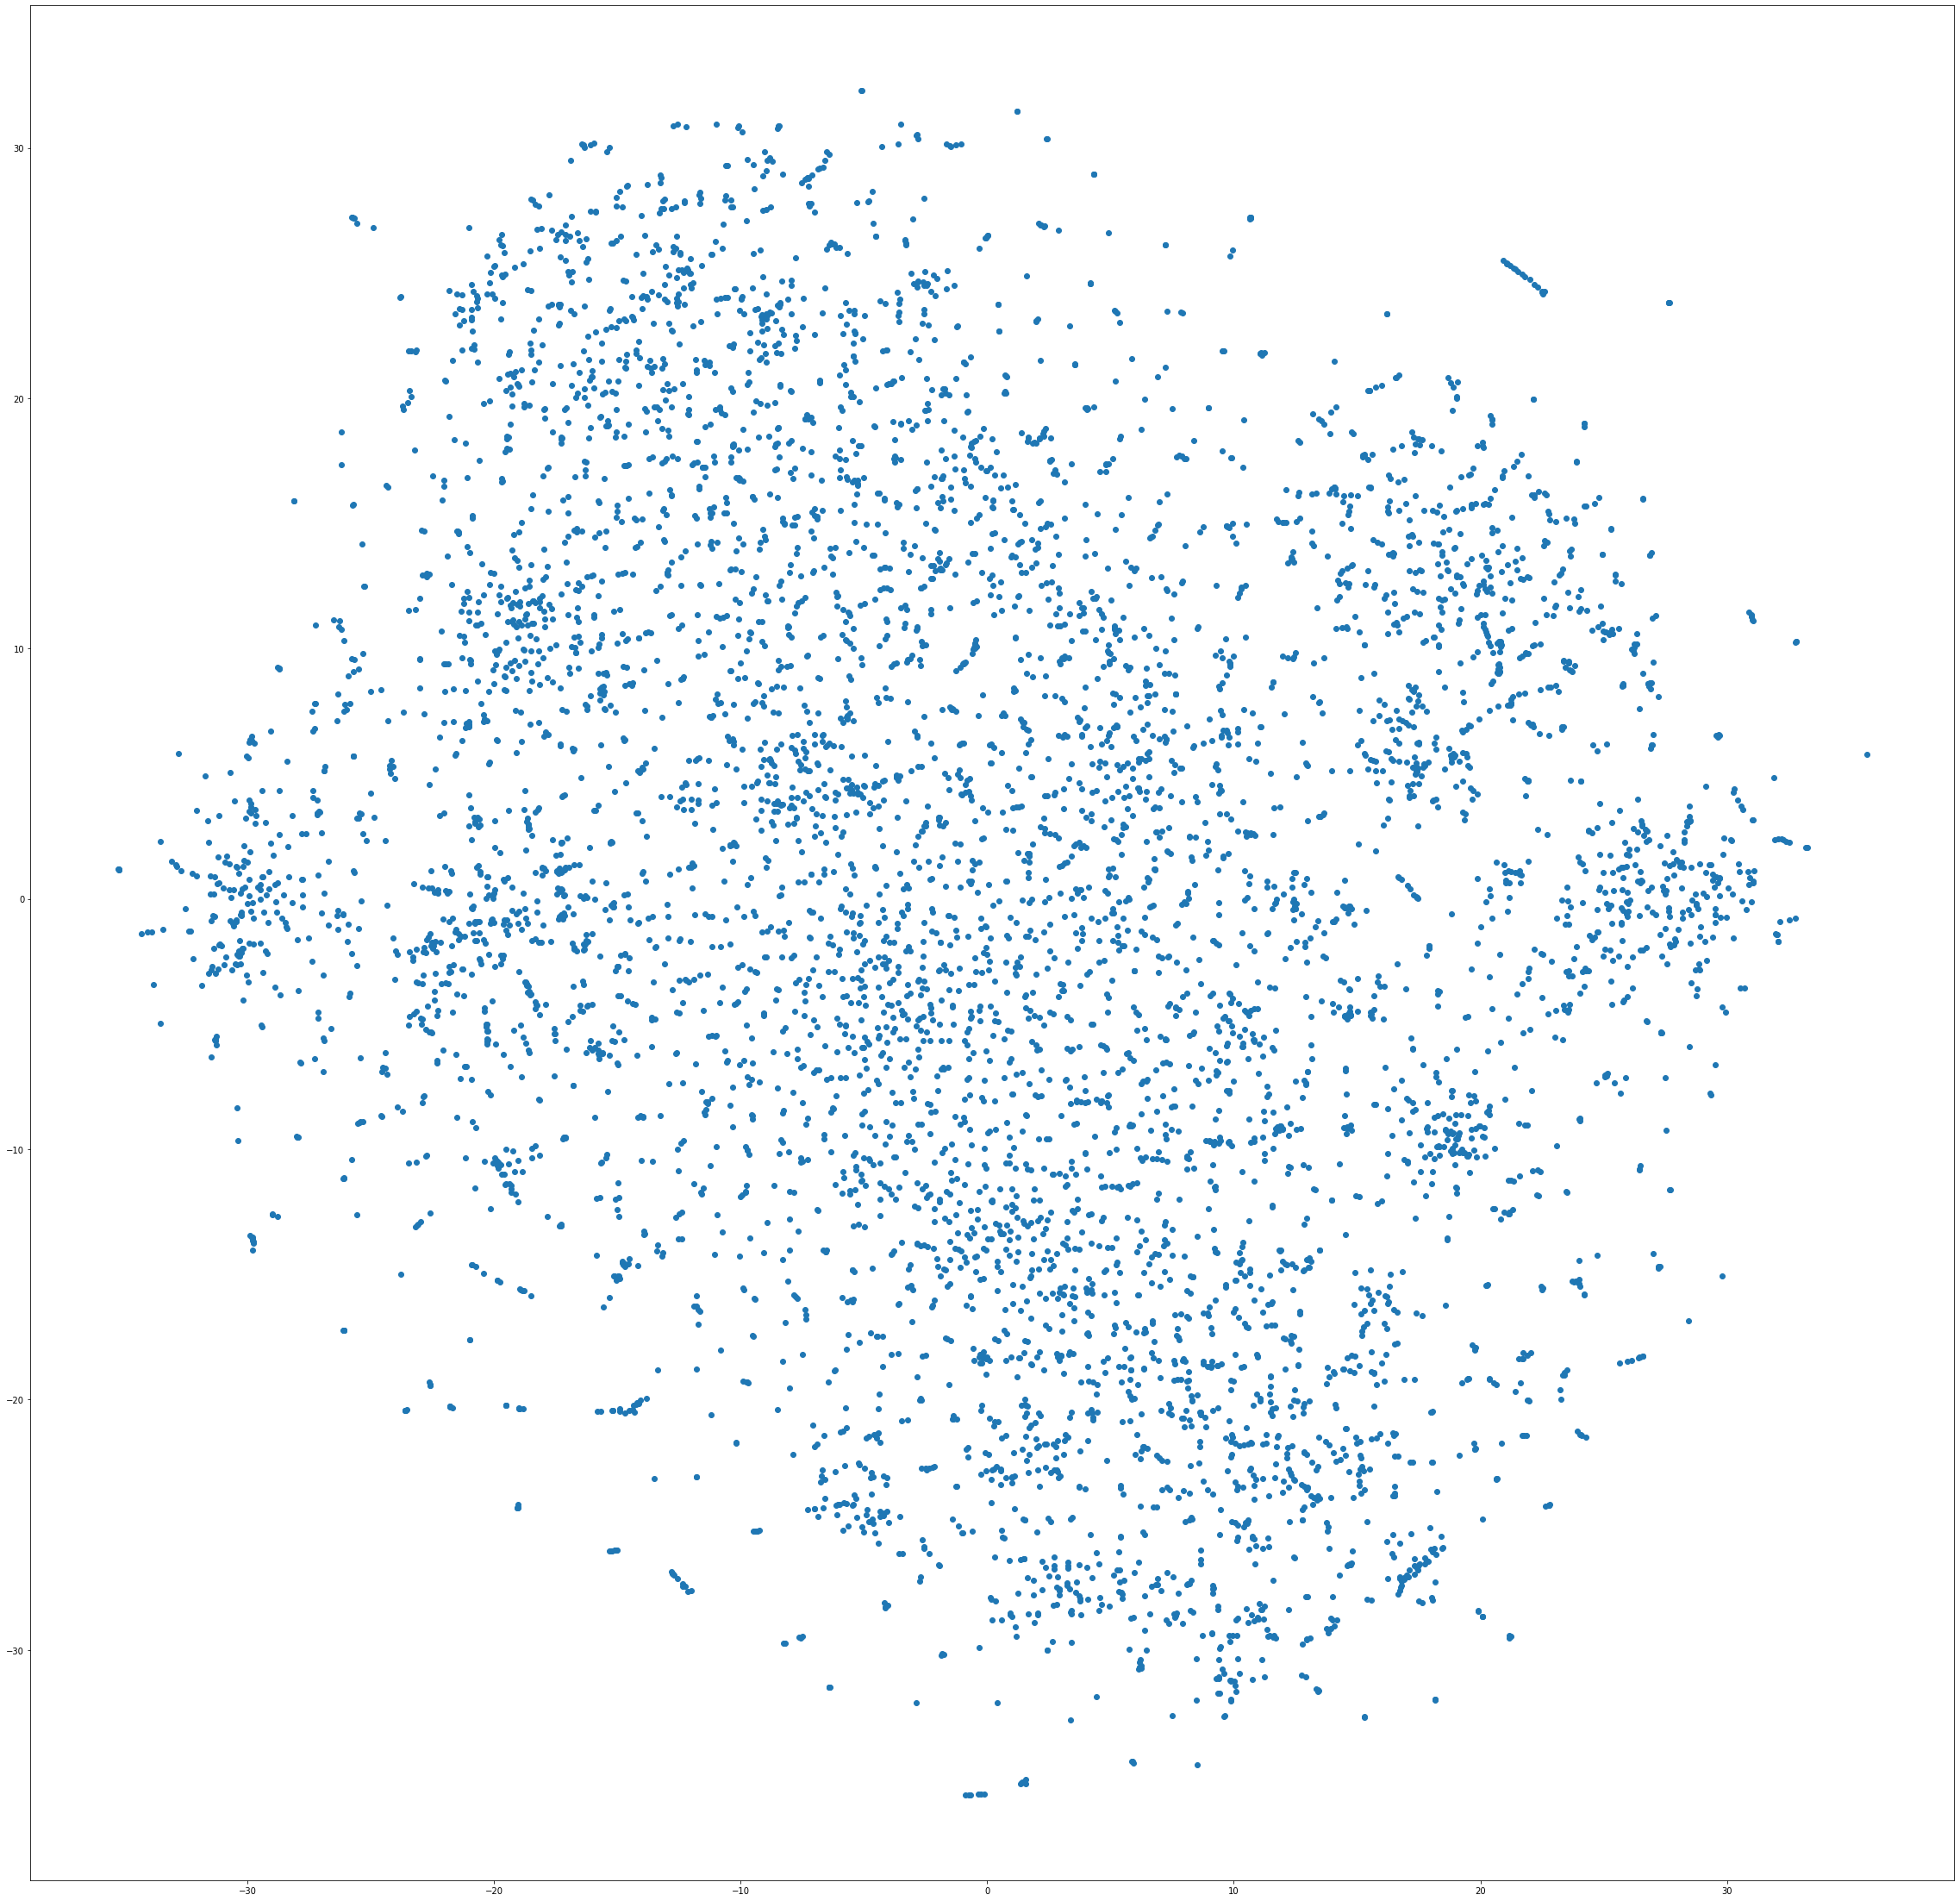

In [4]:

load_embeddings_file_name = "../data/Technology_sample7000_vectors_TSNEed.txt"
embeddings = np.array(load_data(load_embeddings_file_name)).astype(np.float)

vis_x = embeddings[:, 0]
vis_y = embeddings[:, 1]
plt.figure(figsize=(40,40))
plt.scatter(vis_x, vis_y)
plt.show()


In [8]:
# colors = itertools.cycle([
#     "#ffdc00","#2ecc40", "#85144b", "#3d9970", "#0074d9", "#ff851b", "#0ff000"
# ])
# color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
#                               'darkorange'])
num_clusters = 15
color_steps = np.linspace(0, 1, num_clusters)
gen_color = cm.get_cmap('gist_ncar')


def plot_gaussians(X, Y, means, covariances, title="Gaussian Mixture"):
    legend_patches = []
    fig, ax_nstd = plt.subplots(figsize=(15, 15))
    for i, (mean, covar) in enumerate(zip(means, covariances)):
        color = gen_color(i)
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        angle = None
        try:
            angle = np.arctan(u[1] / u[0])
        except:
            pass
        if angle is None:
            angle = 0
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_alpha(0.5)
        ax_nstd.add_patch(ell)
        legend_patches.append(mpatches.Patch(color=color, label=f'Topic {i}'))
        ax_nstd.scatter(X, Y, marker=".")
    plt.xlim(-40., 40.)
    plt.ylim(-40., 40.)
    plt.xticks(np.linspace(-40., 40.,8))
    plt.yticks(np.linspace(-40., 40.,8))
    plt.title(title)
    plt.legend(handles=legend_patches)
    fig.show()
# import matplotlib as mpl
# def plot_gaussians(X, Y, means, covariances, title="Gaussian Mixture"):
#     fig, ax_nstd = plt.subplots(figsize=(15, 15))
#     for i, (mean, covar, color) in enumerate(zip(means, covariances, colors)):
#         v, w = linalg.eigh(covar)
#         v = 2. * np.sqrt(2.) * np.sqrt(v)
#         u = w[0] / linalg.norm(w[0])
#         angle = None
#         try:
#             angle = np.arctan(u[1] / u[0])
#         except:
#             pass
#         if angle is None:
#             angle = 0
#         angle = 180. * angle / np.pi  # convert to degrees
#         ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
#         ell.set_alpha(0.5)
#         ax_nstd.add_patch(ell)
#         ax_nstd.scatter(X, Y, marker=".")
#     plt.xlim(-40., 40.)
#     plt.ylim(-40., 40.)
#     plt.xticks(np.linspace(-40., 40.,8))
#     plt.yticks(np.linspace(-40., 40.,8))
#     plt.title(title)
#     fig.show()

/opt/anaconda3/envs/GMMSpark/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


FileNotFoundError: [Errno 2] No such file or directory: '../iteration4_gmm_params.json'

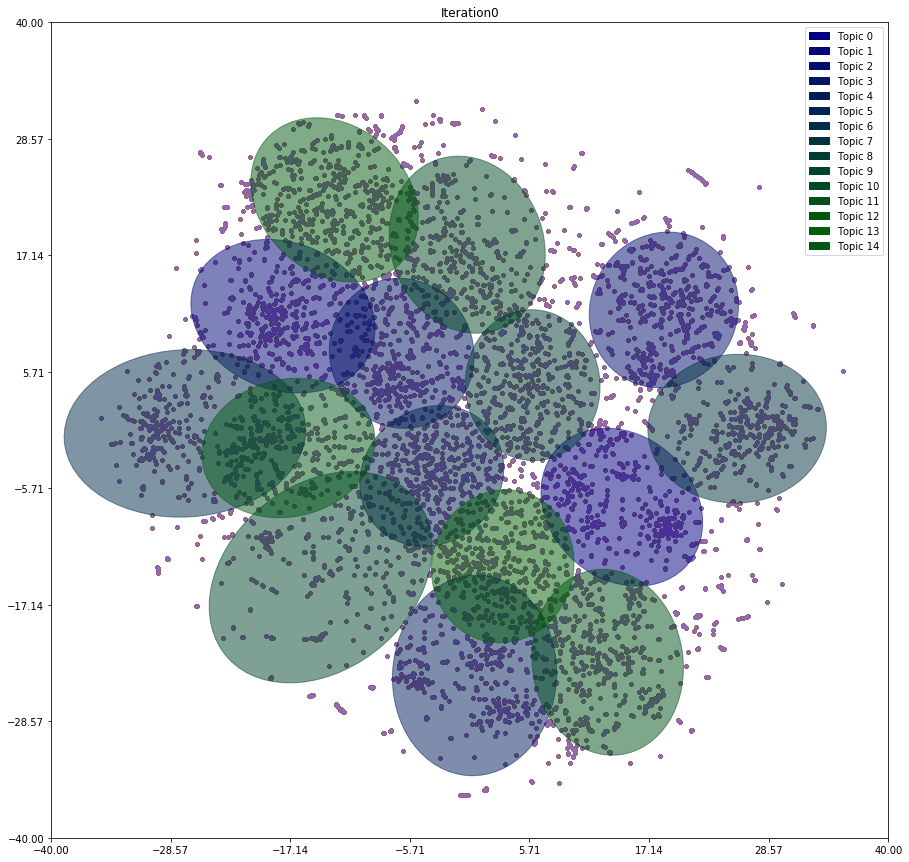

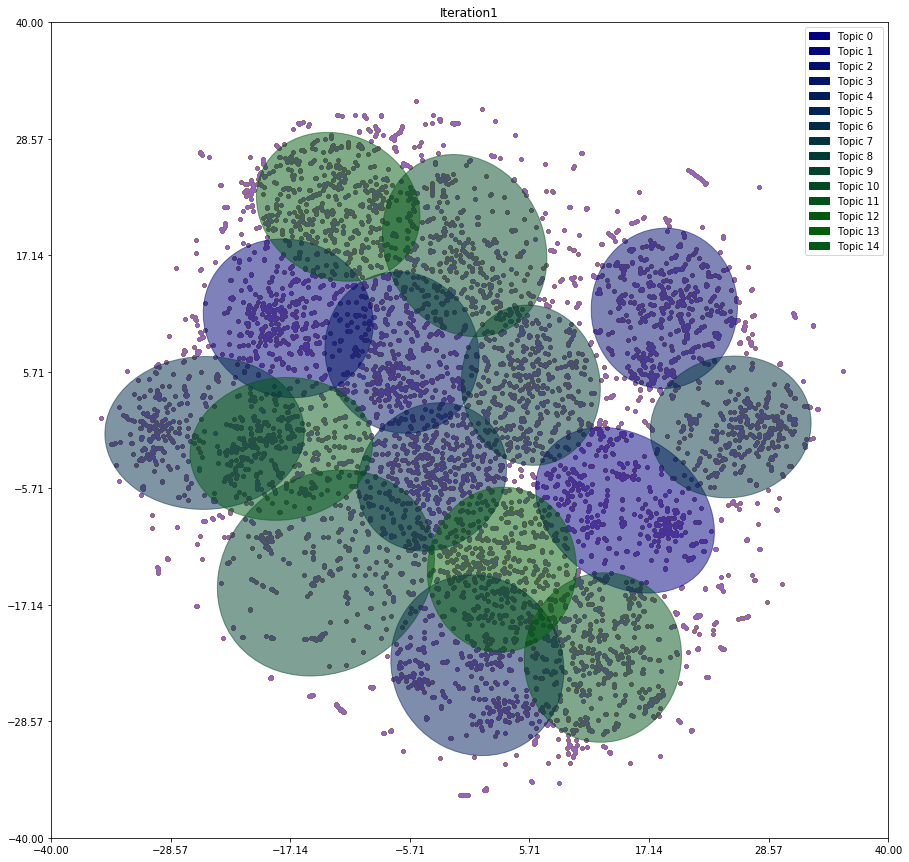

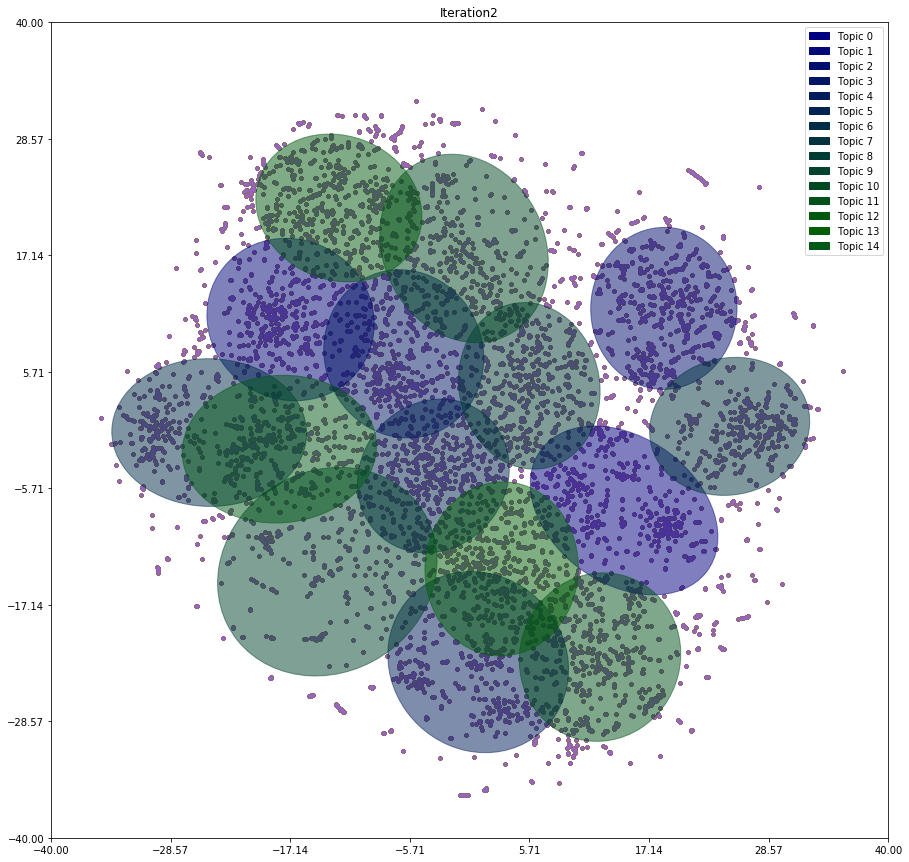

In [7]:
import ujson
X = vis_x
Y = vis_y
means = []
covs = []

for i in range(4):
    with open(f'../iteration{i+1}_gmm_params.json','r') as rfile:
        for line in rfile:
            d = ujson.loads(line)
            means.append(d['mean'])
            covs.append(d['covariance'])
        plot_gaussians(X, Y, means, covs, title=f"Iteration{i}")
        means = []
        covs = []

        